Part 2 of the data analysis for section 1: NER and aspect-level sentiment analysis.

# Load Data

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# from https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
from IPython.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

pd.set_option('display.max_colwidth', None)

In [ ]:
df_frontpage = pd.read_parquet('../processed_data/a1_data.parquet')

leanings = ['Left', 'Lean Left', 'Center', 'Lean Right', 'Right']
df_frontpage

# Create Dataset for SA

In [11]:
left= "Biden, Democrat, Pelosi, Democratic, Harris, Kamala Harris, AOC, Dems, Blinken, Dem, Hillary Clinton, Psaki, Biden Administration, Sinema, Schumer, Nancy Pelosi, Jen Psaki, Joe Manchin, Clinton, Alexandria Ocasio-Cortez, Clyburn, Michelle Obama, Gavin Newsom, Jake Sullivan, Bill de Blasio, Democratic Party, Alvin Bragg, DNC, Chuck Schumer, Jill Biden, Antony Blinken, BIDEN, Kyrsten Sinema, Newsom, Andrew Cuomo, Cuomo, Harry Reid, Joe"
right= "Republican, Trump, GOP, DeSantis, Ted Cruz, Ron DeSantis, RNC, Pence, McConnell, Sarah Palin, Rand Paul, Mike Pence, Cruz, Marjorie Taylor Greene,  Kevin McCarthy, Lindsey Graham, Tom Cotton, Romney, Glenn Youngkin, Josh Hawley, Marco Rubio, Steve Bannon, Rudy Giuliani, Republican Party, Greg Abbott, Matt Gaetz, Mark Meadows, Rick Scott, Giuliani, Jim Jordan, Madison Cawthorn, Ron Johnson, Mitch McConnell, Ginni Thomas, Palin, Abbott"

In [12]:
left = [x.strip() for x in left.split(",")]
right = [x.strip() for x in right.split(",")]

In [13]:
df_left = df_frontpage[df_frontpage["word_2"].isin(left)]
df_right = df_frontpage[df_frontpage["word_2"].isin(right)]

In [14]:
def normalize_counts(df, df_frontpage = df_frontpage, normalize = True):
    df = df["leaning"].value_counts()
    if not normalize:
        # return the original value counts
        return df
        
    for x in df.index:
        total_text = len(df_frontpage[df_frontpage["leaning"] == x])
        df[x] /= total_text

    return df

df_left_counts = normalize_counts(df_left)[leanings]
df_right_counts = normalize_counts(df_right)[leanings]

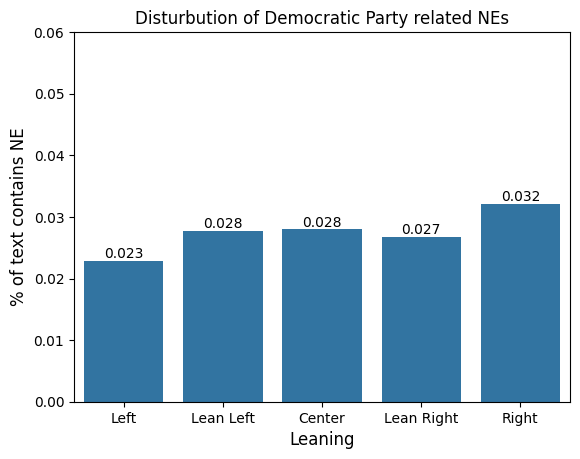

In [17]:
ax = sns.barplot(data = df_left_counts)
for i in ax.containers:
    ax.bar_label(i, fmt='%.3f')

plt.xlabel('Leaning', fontsize = 12)
plt.ylabel('% of text contains NE', fontsize = 12)
plt.title('Disturbution of Democratic Party related NEs', fontsize = 12)

# Display the plot
plt.ylim(0, 0.06) 
plt.show()

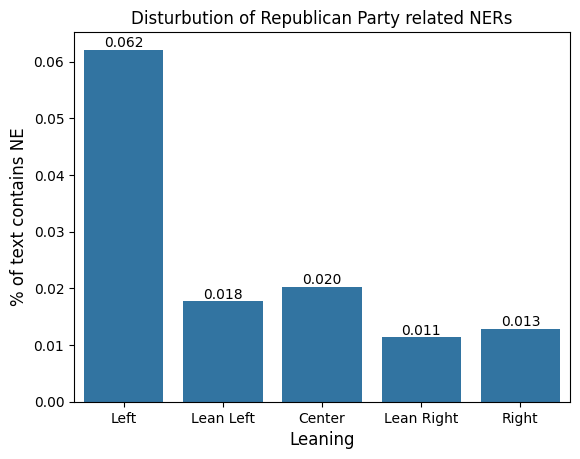

In [19]:
ax = sns.barplot(data = df_right_counts[leanings])
for i in ax.containers:
    ax.bar_label(i, fmt='%.3f')

plt.xlabel('Leaning', fontsize = 12)
plt.ylabel('% of text contains NE', fontsize = 12)

# Set the title of the plot
plt.title('Disturbution of Republican Party related NERs', fontsize = 12)

# Display the plot
plt.show()

# Examine and Label NER

In [42]:
NER_counts = df_frontpage["word_2"].value_counts()
NER_counts = NER_counts[NER_counts > 100].index.to_list()
NER_counts = [x for x in NER_counts if "," not in x]

In [49]:
import csv

# CSV file name
filename = 'NER_100_counts.csv'

# Writing to csv file
with open(filename, 'w', newline='') as csvfile:
    # Create a writer object
    csvwriter = csv.writer(csvfile)
    
    for item in NER_counts:
        csvwriter.writerow([item]) 


In [19]:
df_frontpage[df_frontpage["word_2"] == "Durham"]

,x,y,height,width,tag,text,name,date,leaning,end,entity,index,score,start,neg,pos,word_2,text_size
285865,908,5443,55,198,a,Durham Suggests Democrat Lawyer Marc Elias Testified at Grand Jury,Breitbart-News,20220126100059,Right,6.0,B-ORG,1.0,0.9975683,0.0,0.741266,0.258734,Durham,165.000000
289326,908,3189,55,175,a,"Waltz: Durham’s Clinton Spying Revelations ‘a Massive, Massive Scandal’",Breitbart-News,20220215205728,Right,15.0,B-LOC,3.0,0.690722,7.0,0.661076,0.338924,Durham,135.563380
289371,468,9852,165,416,a,…Sussmann Lawyers Furious at Durham for Exposing Spying; Complain About Breitbart Coverage…,Breitbart-News,20220215205728,Right,35.0,B-ORG,10.0,0.97521204,29.0,0.932564,0.067436,Durham,754.285714
289482,1128,1231,80,148,em,Sussmann Lawyers Furious at Durham; Complain About Breitbart Coverage,Breitbart-News,20220215205728,Right,34.0,B-ORG,9.0,0.8384237,28.0,0.968605,0.031395,Durham,171.594203
291500,908,5458,55,198,a,Durham Suggests Democrat Lawyer Marc Elias Testified at Grand Jury,Breitbart-News,20220126060403,Right,6.0,B-ORG,1.0,0.9975683,0.0,0.741266,0.258734,Durham,165.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901312,968,8768,25,530,a,"Psaki Dodges On Durham, Directs Questions To DOJ",The-Daily-Caller,20220217162146,Right,22.0,B-LOC,6.0,0.5706012,16.0,0.817237,0.182763,Durham,276.041667
1911770,1016,1662,92,185,a,Right wing criticizes media for lack of coverage on Durham probe,The-Hill,20220216065431,Center,58.0,B-LOC,11.0,0.7532573,52.0,0.935060,0.064940,Durham,265.937500
1924152,48,3577,17,551,span,"Technology Executive, Clinton Campaign Lawyer Respond to Durham’s Latest Filing",The-Epoch-Times,20220215160840,Lean Right,65.0,B-LOC,12.0,0.64918214,57.0,0.394047,0.605953,Durham,118.569620
1924302,48,7405,17,534,a,Facts Matter (Feb. 14): Durham Reveals How Trump’s White House Was Spied On,The-Epoch-Times,20220215160840,Lean Right,30.0,B-ORG,10.0,0.99931324,24.0,0.713918,0.286082,Durham,121.040000


# Aspect-level SA

## perp data set

In [22]:
import re

def add_token_around_word(text, word, token):    
    # Create a regular expression pattern for the whole word
    pattern = r'\b{}\b'.format(re.escape(word))

    # Replace the word with the token before and after it
    replaced_text = re.sub(pattern, lambda match: f'{token}{match.group(0)}{token}', text, count=1)

    if replaced_text == text:
        pattern = r'\b{}\b'.format(re.escape(word + "s"))
        new_text = re.sub(pattern, lambda match: f'{token}{match.group(0)}{token}', text, count=1)
        
        if new_text != text:
            return new_text
        else:    
            print(text)
            print(word)

    return replaced_text

In [175]:
left_NER = df_left.drop_duplicates(subset=['word_2', 'text']).apply(lambda x : add_token_around_word(x["text"], x["word_2"], "[ASP]"), axis = 1)

#BareShelvesBiden trends on Twitter as shoppers encounter desolate grocery store
Biden


In [178]:
right_NER = df_right.drop_duplicates(subset=['word_2', 'text']).apply(lambda x : add_token_around_word(x["text"], x["word_2"], "[ASP]"), axis = 1)

## Invoking Huggingface Model

In [271]:
import requests, json
from tqdm import tqdm

SA_url= "https://beilr-pyabsa-apc.hf.space/api/predict"
s = "Garland, under pressure to hold [ASP]Trump[ASP] accountable, to speak on DOJ's Jan. 6 probe"

def get_SA(url, data):
    request_json = {"data": [data]}
    response = requests.post(url, data=json.dumps(request_json))

    try:
        result = response.json()["data"][0]["data"][0]
        SA, confidence = result[1], result[2]
    
        return str(SA) + "," + str(confidence)
    except:
        print(data)
        print(response.json())
        return ""

In [280]:
#process left NERs
filename = "./data/left_NER_SA.csv"

# Write the list to the file
with open(filename, "w", encoding="utf-8") as file:
    for x in tqdm(left_NER.to_list()):
        line = x + "\t" + get_SA(SA_url, x)
        file.write(line + "\n")
        file.flush()

 34%|███████████████████████████████████████████████████                                                                                                    | 5310/15721 [05:34<09:37, 18.01it/s]

#BareShelvesBiden trends on Twitter as shoppers encounter desolate grocery store
{'error': 'list index out of range'}


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15721/15721 [16:20<00:00, 16.04it/s]


In [267]:
get_SA(SA_url, "[ASP]Nancy Pelosi[ASP] Sets Jan. 6 Schedule, Historians to 'Establish Narrative")

'Neutral,0.545'

In [247]:
#process right NERs
filename = "./data/right_NER_SA.csv"

# Write the list to the file
with open(filename, "w", encoding="utf-8") as file:
    for x in tqdm(right_NER.to_list()):
        line = x + "\t" + get_SA(SA_url, x)
        file.write(line + "\n")
        file.flush()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9686/9686 [10:15<00:00, 15.73it/s]


## SA result

In [20]:
# Specify the filename
def read_NER_SA(path):
    # Read the file
    SA_map = {}
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            # You can optionally strip newline characters or trailing spaces
            text, result = line.split("\t")
            SA_map[text] = {"SA" : result.split(",")[0], "Confidence" : result.split(",")[1][:-1]}

    return SA_map

left_NER_dict = read_NER_SA("./data/left_NER_SA.csv")
right_NER_dict = read_NER_SA("./data/right_NER_SA.csv")

In [23]:
def match_with_SA(row, NER_dict, min_confidence = 0):
    # print(row)
    tokenized_text = add_token_around_word(row["text"], row["word_2"], "[ASP]")

    if tokenized_text in NER_dict:
        row["ASP"] = NER_dict[tokenized_text]["SA"]
        row["ASP_Confidence"] = NER_dict[tokenized_text]["Confidence"]
    else:
        row["ASP"] = None
        row["ASP_Confidence"] = -1

    return row

df_left = df_left.apply(lambda x : match_with_SA(x, left_NER_dict), axis = 1)
df_right = df_right.apply(lambda x : match_with_SA(x, right_NER_dict), axis = 1)

#BareShelvesBiden trends on Twitter as shoppers encounter desolate grocery store
Biden


In [24]:
df_left['ASP_Confidence'] = df_left['ASP_Confidence'].astype("float64")
df_left.to_parquet("./data/SA_df/left_SA.parquet")

df_right['ASP_Confidence'] = df_right['ASP_Confidence'].astype("float64")
df_right.to_parquet("./data/SA_df/right_SA.parquet")

In [25]:
df_left = df_left.dropna(subset=['ASP'])
df_right = df_right.dropna(subset=['ASP'])

In [26]:
df_left = df_left.drop_duplicates(subset=["text"])

In [27]:
def normalize_counts(df, df_frontpage = df_frontpage, normalize = True):
    if not normalize:
        # return the original value counts
        return df
        
    for x in df.index:
        total_text = len(df_frontpage[df_frontpage["leaning"] == x])
        df[x] /= total_text

    return df

df_left_counts

normalize_counts(df_left_counts)

leaning
Left          2.355022e-07
Lean Left     9.832252e-08
Center        1.695644e-07
Lean Right    2.377795e-07
Right         4.824450e-08
Name: count, dtype: float64

In [93]:
df_frontpage[df_frontpage["leaning"] == "Left"]

,x,y,height,width,tag,text,name,date,leaning,end,entity,index,score,start,neg,pos,word_2,text_size
656,272,706,152,521,a,The Ugly History of New Year’s Is Too Real for White GOPers,Daily-Beast,20220101005121,Left,30.0,B-MISC,2.0,0.6156665,4.0,0.986593,0.013407,Ugly History of New Year,1342.237288
658,252,912,84,561,p,"Enslaved Black people dreaded New Year’s in Civil War-era America, when they might be separated from loved ones. Just don’t tell the people yelling about “critical race theory.”",Daily-Beast,20220101005121,Left,14.0,B-MISC,4.0,0.99879706,9.0,0.940729,0.059271,Black,266.237288
659,252,912,84,561,p,"Enslaved Black people dreaded New Year’s in Civil War-era America, when they might be separated from loved ones. Just don’t tell the people yelling about “critical race theory.”",Daily-Beast,20220101005121,Left,57.0,B-MISC,13.0,0.9985281,44.0,0.940729,0.059271,Civil War-era,266.237288
660,252,912,84,561,p,"Enslaved Black people dreaded New Year’s in Civil War-era America, when they might be separated from loved ones. Just don’t tell the people yelling about “critical race theory.”",Daily-Beast,20220101005121,Left,65.0,B-LOC,17.0,0.99925584,58.0,0.940729,0.059271,America,266.237288
661,873,568,104,276,a,"Betty White, Everybody’s Favorite Foxy Grandmother, Has Died",Daily-Beast,20220101005121,Left,11.0,B-PER,1.0,0.99536884,0.0,0.943193,0.056807,Betty White,478.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977921,1344,6688,48,344,h2,Sha’Carri Richardson on the Meaning of Time in Running and in Life,The-New-Yorker,20220329063647,Left,43.0,B-PER,3.0,0.49865964,3.0,0.135429,0.864571,’Carri Richardson on the Meaning of Time,250.181818
1977922,1344,7005,48,344,h2,A Soldier Goes Missing in Ukraine—Can His Father Find Him?,The-New-Yorker,20220329063647,Left,37.0,B-LOC,6.0,0.9997358,26.0,0.977264,0.022736,Ukraine—Can,284.689655
1977935,968,7542,19,172,a,Buy Covers and Cartoons,The-New-Yorker,20220329063647,Left,NaN,None,NaN,None,NaN,NaN,NaN,None,142.086957
1977949,1344,7702,19,144,a,Condé Nast Spotlight,The-New-Yorker,20220329063647,Left,NaN,None,NaN,None,NaN,NaN,NaN,None,136.800000


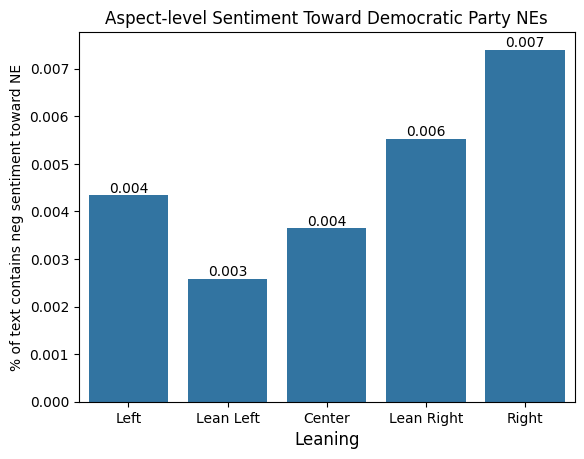

In [40]:
df_left_g = df_left[df_left["ASP"] == "Negative"].groupby("leaning")
df_left_counts = df_left_g["ASP"].size()[leanings]
# df_left_counts= pd.DataFrame(df_left_counts)
# Display the plot
ax = sns.barplot(normalize_counts(df_left_counts))

for i in ax.containers:
    ax.bar_label(i, fmt='%.3f')

plt.xlabel('Leaning', fontsize = 12)
plt.ylabel('% of text contains neg sentiment toward NE', fontsize = 10)
plt.title('Aspect-level Sentiment Toward Democratic Party NEs', fontsize=12)
plt.show()

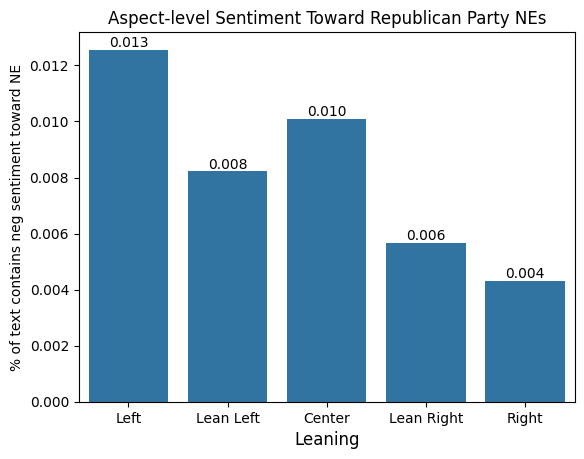

In [73]:
# right_SA = normalize_counts(df_right_counts)
df_right_g = df_right[df_right["ASP"] == "Negative"].groupby("leaning")
df_right_counts = df_right_g["ASP"].size()[leanings]
ax = sns.barplot(right_SA)

for i in ax.containers:
    ax.bar_label(i, fmt='%.3f')


plt.xlabel('Leaning', fontsize = 12)
plt.ylabel('% of text contains neg sentiment toward NE', fontsize = 10)
plt.title('Aspect-level Sentiment Toward Republican Party NEs', fontsize=12)
plt.show()

## SA standard Deviation

In [123]:
from datetime import datetime, date, timedelta

def group_by_day(time):
    # "20220101064729" -> "0101"
    return time[:8]

def word_counts_by_day(df, leaning, only_negative = False):
    df = df[df["leaning"] == leaning]
    if only_negative:
        df = df[df["ASP"] == "Negative"]
    df["date"] = df["date"].apply(group_by_day)

    grouped_value_counts = df.groupby('date')['date'].value_counts()
        
    # Loop through the date range
    start_date = date(2022, 1, 1)
    current_date = start_date
    data = []
    for i in range(90):
        strdate = current_date.strftime('%Y%m%d')
        if strdate in grouped_value_counts:
            data.append((grouped_value_counts[strdate]))
        else:
            data.append(0)
            
        current_date += timedelta(days=1)

    return pd.DataFrame(data,  columns=[leaning])

def get_SA_trend(df, leaning):
    df_neg = word_counts_by_day(df, leaning, only_negative=True)
    df_neg[leaning] /= neg_word_counts_by_day(df, leaning)[leaning]

    return df_neg

In [134]:
def mean_and_sd(df, leaning):
    t = get_SA_trend(df, leaning)
    # Calculate mean
    mean_value = t[leaning].mean()
    
    # Calculate standard deviation
    std_dev = t[leaning].std()
    
    print(leaning, "Standard Deviation:", std_dev)

for x in leanings:
    mean_and_sd(df_left, x)

Left Standard Deviation: 0.017277697641304452
Lean Left Standard Deviation: 0.029219826054748155
Center Standard Deviation: 0.029635304912501798
Lean Right Standard Deviation: 0.023767442210092044
Right Standard Deviation: 0.06916020468378047


In [135]:
for x in leanings:
    mean_and_sd(df_right, x)

Left Standard Deviation: 0.06178699018014053
Lean Left Standard Deviation: 0.049360670883939736
Center Standard Deviation: 0.041780355720525866
Lean Right Standard Deviation: 0.019945960147645492
Right Standard Deviation: 0.06303957063091807
